In [40]:
import numpy as np
import pandas as pd

In [41]:
df = pd.read_csv('customer_churn_large_dataset.csv')
df.head()

,CustomerID,Name,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
0,1,Customer_1,63,Male,Los Angeles,17,73.36,236,0
1,2,Customer_2,62,Female,New York,1,48.76,172,0
2,3,Customer_3,24,Female,Los Angeles,5,85.47,460,0
3,4,Customer_4,36,Female,Miami,3,97.94,297,1
4,5,Customer_5,46,Female,Miami,19,58.14,266,0


In [42]:
df.shape

(100000, 9)

In [43]:
categorical_variables = [col for col in df.columns if col in "O"
                        or df[col].nunique() <=11
                        and col not in "Churn"]

categorical_variables

['Gender', 'Location']

In [44]:
numeric_variables = [col for col in df.columns if df[col].dtype != "object"
                        and df[col].nunique() >11
                        and col not in "Name"]
numeric_variables

['CustomerID',
 'Age',
 'Subscription_Length_Months',
 'Monthly_Bill',
 'Total_Usage_GB']

In [45]:
df["Age"].describe()

count    100000.000000
mean         44.027020
std          15.280283
min          18.000000
25%          31.000000
50%          44.000000
75%          57.000000
max          70.000000
Name: Age, dtype: float64

In [46]:
import seaborn as sns
import matplotlib.pyplot as plt


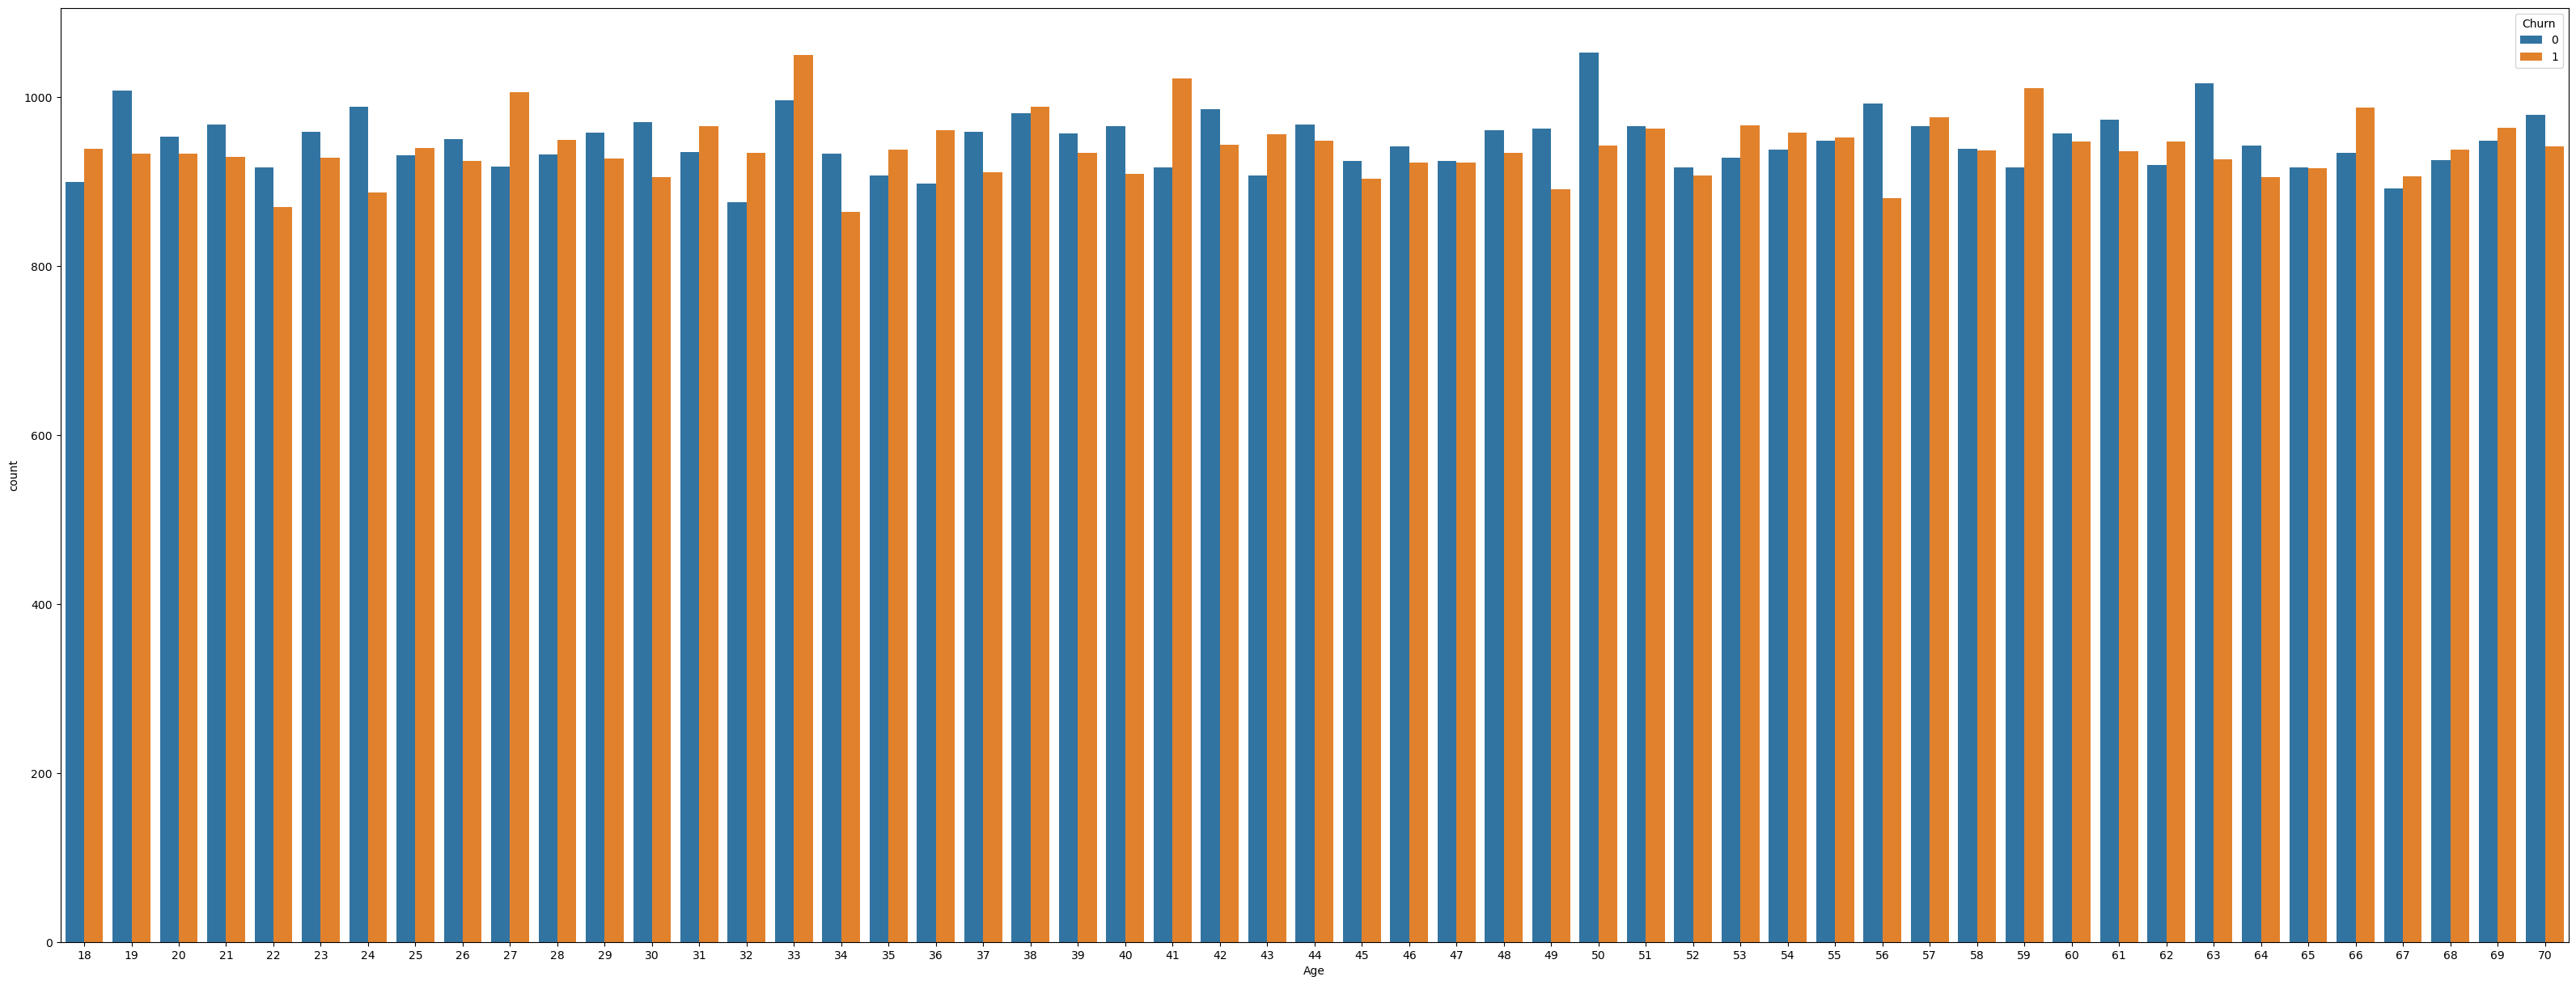

In [47]:
plt.figure(figsize = (40,15))
sns.countplot(x = 'Age', hue = 'Churn', data = df)
plt.show()

In [48]:
def Age_dis(a):
    if a<=20:
        return 1
    elif a>20 and a<=30:
        return 2
    elif a>30 and a<=40:
        return 3
    elif a>40 and a<=50:
        return 4
    elif a>50 and a<=60:
        return 5
    else:
        return 6

df["Age_group"]=df["Age"].apply(lambda x: Age_dis(x))

In [49]:
df["Age_group"].value_counts()

5    18966
4    18932
3    18864
6    18815
2    18757
1     5666
Name: Age_group, dtype: int64

<AxesSubplot:xlabel='Age_group', ylabel='count'>

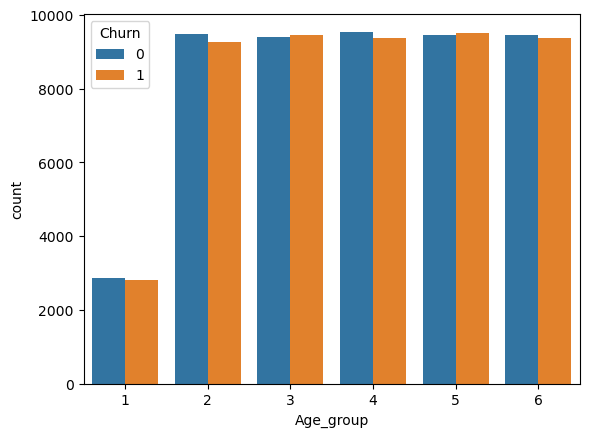

In [50]:
sns.countplot(x="Age_group", hue="Churn", data=df)

In [16]:
df["Subscription_Length_Months"].describe()

count    100000.000000
mean         12.490100
std           6.926461
min           1.000000
25%           6.000000
50%          12.000000
75%          19.000000
max          24.000000
Name: Subscription_Length_Months, dtype: float64

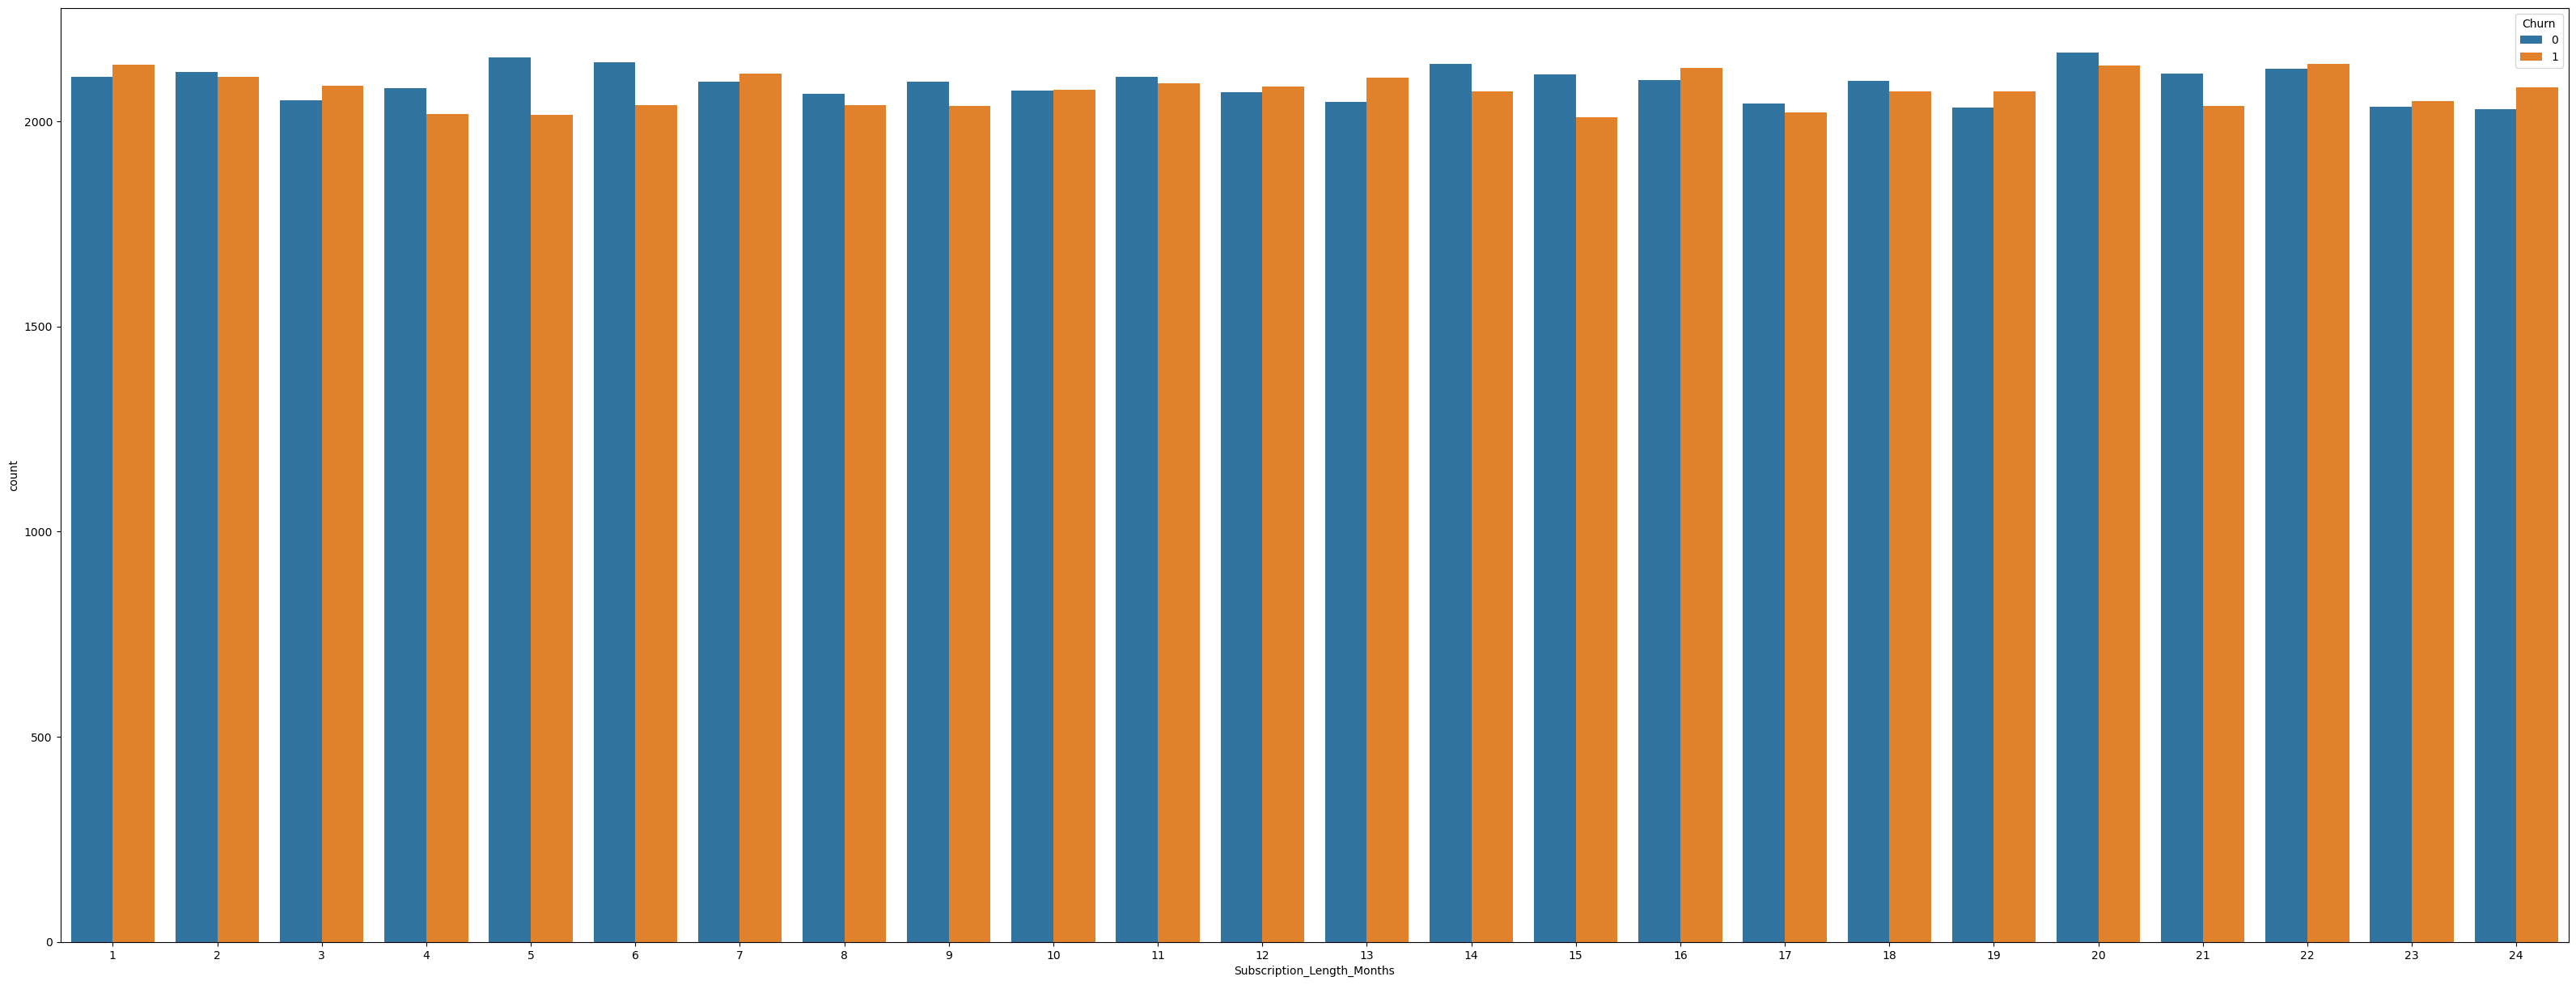

In [17]:
plt.figure(figsize = (40,15))
sns.countplot(x = 'Subscription_Length_Months', hue = 'Churn', data = df)
plt.show()

In [18]:
df["Monthly_Bill"].describe()

count    100000.000000
mean         65.053197
std          20.230696
min          30.000000
25%          47.540000
50%          65.010000
75%          82.640000
max         100.000000
Name: Monthly_Bill, dtype: float64

In [51]:
def Bill_dis(b):
    if b<=40:
        return 1
    elif b>40 and b<=50:
        return 2
    elif b>50 and b<=60:
        return 3
    elif b>60 and b<=70:
        return 4
    elif b>70 and b<=80:
        return 5
    elif b>80 and b<=90:
        return 6
    else:
        return 7

df["Monthly_bill_group"]=df["Monthly_Bill"].apply(lambda x: Bill_dis(x))

In [52]:
df["Monthly_bill_group"].value_counts()

7    14463
3    14355
1    14293
6    14276
2    14239
5    14198
4    14176
Name: Monthly_bill_group, dtype: int64

<AxesSubplot:xlabel='Monthly_bill_group', ylabel='count'>

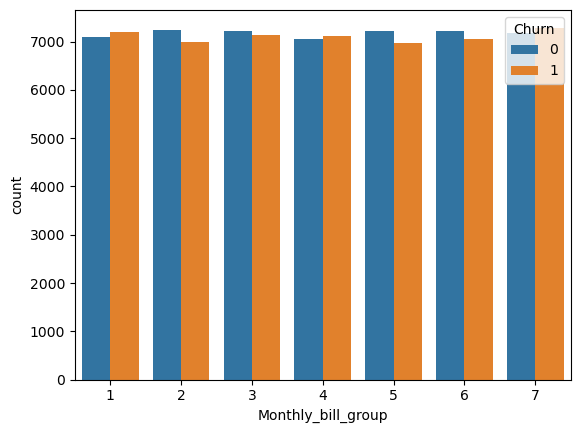

In [53]:
sns.countplot(x="Monthly_bill_group", hue="Churn", data=df)

In [54]:
df["Total_Usage_GB"].describe()

count    100000.000000
mean        274.393650
std         130.463063
min          50.000000
25%         161.000000
50%         274.000000
75%         387.000000
max         500.000000
Name: Total_Usage_GB, dtype: float64

In [55]:
def GB_dis(c):
    if c<=100:
        return 1
    elif c>100 and c<=150:
        return 2
    elif c>150 and c<=200:
        return 3
    elif c>200 and c<=250:
        return 4
    elif c>250 and c<=300:
        return 5
    elif c>300 and c<=350:
        return 6
    elif c>350 and c<=400:
        return 7
    elif c>400 and c<=450:
        return 8
    else:
        return 9

df["Total_GB_group"]=df["Total_Usage_GB"].apply(lambda x: GB_dis(x))

In [56]:
df["Total_GB_group"].value_counts()

1    11474
2    11174
9    11156
4    11143
5    11061
7    11041
6    11022
3    11012
8    10917
Name: Total_GB_group, dtype: int64

<AxesSubplot:xlabel='Total_GB_group', ylabel='count'>

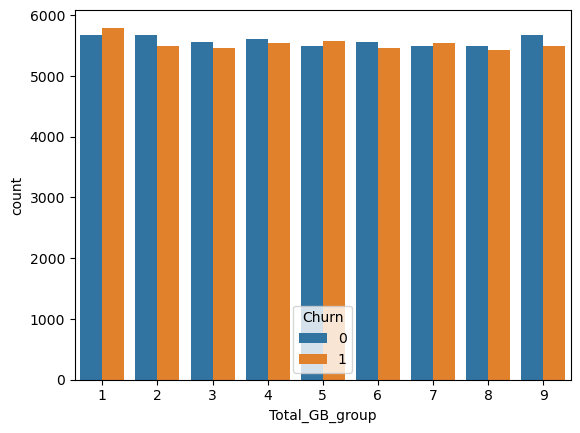

In [57]:
sns.countplot(x="Total_GB_group", hue="Churn", data=df)

<AxesSubplot:>

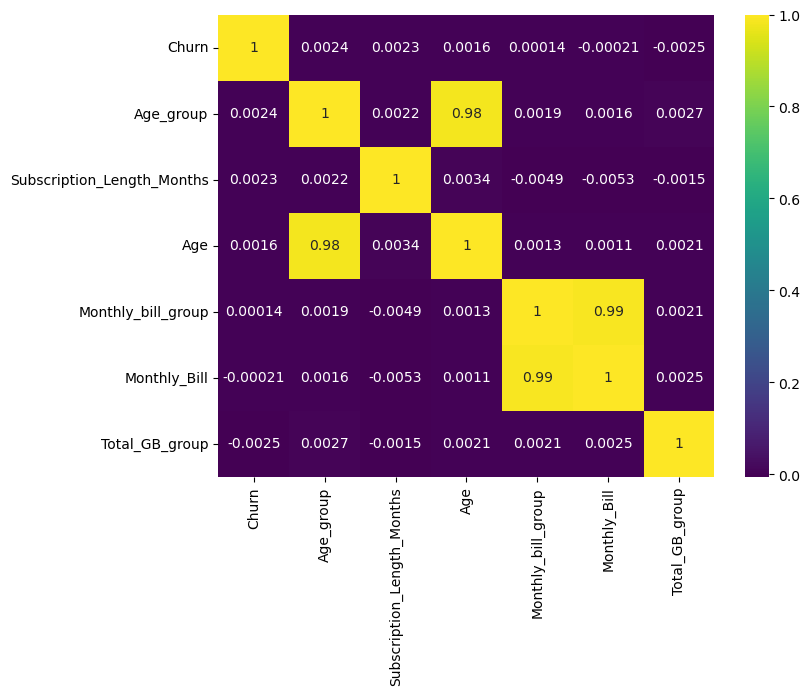

In [60]:
k = 7
cols = df.corr().nlargest(k, 'Churn')['Churn'].index
cm = df[cols].corr()
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, cmap = 'viridis')